In [4]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file=pd.read_csv('data.csv')
#print(file.describe())
#print(file.size)
#file.fillna(0)

In [5]:
first_input=file['Engine HP']
second_input=file['highway MPG']
mfirst=np.mat(first_input)
msecond=np.mat(second_input)
rows_of_mfirst=np.shape(mfirst)[1]
ones_matrix=np.ones((1,rows_of_mfirst),dtype=int)
input_x=np.hstack((ones_matrix.T,mfirst.T))

In [6]:
def not_gaussian_density(point,inputx,thau):
    m=np.shape(inputx)[0]
    weights=np.mat(np.eye(m))
    
    for j in range (m):
        difference_in_x=point-inputx[j]
        weights[j,j]=np.exp(difference_in_x*difference_in_x.T/(-2.0*thau**2))
    return weights
        

In [7]:
def local_theta(point,inputx,outputy,thau):
    weight=not_gaussian_density(point,inputx,thau)
    wt=(inputx.T*(weight*inputx)).I*(inputx.T*weight*outputy.T)
    return wt

In [8]:
def Locally_weighted_theta(input_x,output_y,thau):
    m=np.shape(input_x)[0]
    new_theta=np.zeros(m)
    for i in range (m):
        new_theta[i]=input_x[i]*local_theta(input_x[i],input_x,output_y,thau)
    return new_theta


In [ ]:
y_predict=Locally_weighted_theta(input_x,msecond,0.5)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file=pd.read_csv("linear_reg.csv")
print(file.shape)
print(file.head())


#extracting input x and output y from the dataset
second_feature=file['fixed acidity'].values
first_feature=file['quality'].values

#since the cost function revolves aroud the matrix and the vertor of the input and output data, changing to matrix
matrix_1=np.mat(first_feature)
output_y=np.mat(second_feature)

print(matrix_1)
print(output_y)

#stacking input values with the matrix of one to transpose matrix_1
rows1=np.shape(matrix_1)[1]
ones_matrix=np.ones((1,rows1),dtype=int)
input_X=np.hstack((ones_matrix.T,matrix_1.T))
print(input_X)
#hstack stack the data's in horizotal order

# =============================================================================
# we knoe for Locally_weighted_regression the hypothesis is given as,
# h(x)=x*theta
# we have calculated the input x from above stacking. theta can be calculated as,
# theta=(xtrans.weight.x)inverse*(x.transpose*weight*y*transpose)
# =============================================================================


# =============================================================================
# Here we calculate the local_weight for each input x
# ∑𝑖𝑒𝑥𝑝(−|𝑥(𝑖)−𝑥|22𝜏2)(𝑦(𝑖)−𝜃𝑇𝑥(𝑖))
# =============================================================================
def local_weight(point_x,x,t):
    a=np.shape(x)[0]
    weights=np.mat(np.eye(a))
    
    for j in range(a):
        deviation_of_x=point_x-x[j]
        weights[j,j]=np.exp((deviation_of_x*deviation_of_x.T)/(-2.0*t**2))
    return weights
#=============================================================================





# =============================================================================
# Now we implement the equation theta=(xtrans.weight.x)inverse*(x.transpose*weight*y*transpose) to find theta
# 
# =============================================================================

def ind_theta(point_x,x,y,t):
    wt=local_weight(point_x,x,t)
    theta_for_x=(x.T*(wt*x)).I*(x.T*(wt*y.T))
    return theta_for_x
    
# ============================================================================= 

def local_regression(x,y,t):
    x_rows=np.shape(x)[0]
    updated_theta=np.zeros(x_rows)
    
# =============================================================================
#  we have created an enitre matrix  having the same rows as input for calculating the cost function.
#  Now we calculate h(x)=x*theta for each theta

# =============================================================================
    for i in range(x_rows):
        updated_theta[i]=x[i]*ind_theta(x[i],x,y,t)
    return updated_theta


# =============================================================================
    


(1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.

LinAlgError: Singular matrix

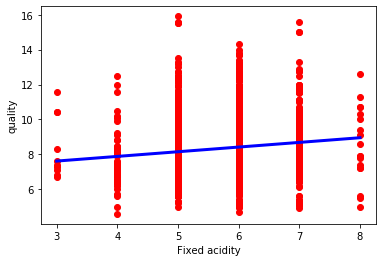

In [17]:
thau=5
hypothesis=local_regression(input_X,output_y,thau)
copy_x=input_X.copy()
copy_x.sort(axis=0)
plt.scatter(first_feature, second_feature, color='red')
plt.plot(copy_x[:, 1], hypothesis[input_X[:, 1].argsort(0)],color="blue",linewidth=3)
plt.xlabel("Fixed acidity")
plt.ylabel("quality")
plt.show()